# 05 - Clustering

## Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np


# scalers
from sklearn.preprocessing import StandardScaler


# cluster
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, estimate_bandwidth

from sklearn.metrics import confusion_matrix

# umap
# UMAP
#!pip install umap-learn
import umap


import matplotlib.pyplot as plt

import functions

pd.set_option('display.max_columns', None)

In [2]:
#path = '/Users/antoniooliveira/Downloads/NTT project'
path = "C:/Users/aprataso/Downloads/final_data/Clustering"

customer_info = pd.read_csv(f'{path}/customer_info_treated.csv')
customer_info.set_index('household_key')
customer_info.head(2)

,household_key,retail_disc,coupon_disc,coupon_match_disc,first_transaction_date,marital_status_code,homeowner_desc,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,Groceries_spend,Delicacies_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,Seafood_spend,COSMETICS_spend,KIOSK-GAS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,MISC. TRANS._spend,SPIRITS_spend,AUTOMOTIVE_spend,TRAVEL & LEISUR_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,Photo/Video_spend,CHARITABLE CONT_spend,RX_spend,VIDEO RENTAL_spend,PROD-WHS SALES_spend,PHARMACY SUPPLY_spend,TOYS_spend,HBC_spend,ELECT &PLUMBING_spend,HOUSEWARES_spend,gender,homeowner_code,total_quantity,total_sales_value,unique_dep_count
0,1,-0.403613,-0.046647,-0.015142,2021-02-20,0,Homeowner,married,senior,2.0,0.0,65.0,42000.0,0.0,2.0,3285.02,226.99,373.56,102.01,568.23,44.09,21.40,4.47,8.55,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1997,4634.32,10
1,2,-0.469174,-0.012605,0.000000,2021-04-13,1,Probable Owner,single,young adult,1.0,0.0,21.5,25000.0,0.0,1.0,1361.50,50.01,238.86,26.55,353.11,0.00,4.56,0.00,23.53,9.62,23.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,834,2091.36,9


since there are variables with very low spend values, experiments will be made without using said variables

In [3]:
customer_info.describe().T

,count,mean,std,min,25%,50%,75%,max
household_key,2500.0,1250.500000,721.832160,1.000000,625.750000,1250.500000,1875.250000,2.500000e+03
retail_disc,2500.0,-0.559792,0.277976,-4.752157,-0.637381,-0.504386,-0.412687,-3.625000e-02
coupon_disc,2500.0,-0.013840,0.027382,-0.421245,-0.014889,-0.004792,0.000000,0.000000e+00
coupon_match_disc,2500.0,-0.002266,0.006354,-0.100779,-0.001655,-0.000185,0.000000,0.000000e+00
marital_status_code,2500.0,0.988800,0.851918,0.000000,0.000000,1.000000,2.000000,2.000000e+00
adult_category_size,2500.0,1.446800,0.497261,1.000000,1.000000,1.000000,2.000000,2.000000e+00
has_kids,2500.0,0.338000,0.473123,0.000000,0.000000,0.000000,1.000000,1.000000e+00
avg_age,2500.0,39.913200,14.451595,21.500000,29.500000,39.500000,49.500000,6.500000e+01
avg_income,2500.0,78072.000000,66852.827436,15000.000000,29500.000000,62000.000000,112000.000000,2.500000e+05
n_kids,2500.0,0.442800,0.706348,0.000000,0.000000,0.000000,1.000000,3.000000e+00


In [4]:
customer_info = customer_info.drop(['HOUSEWARES_spend', 'ELECT &PLUMBING_spend', 'HBC_spend', 'TOYS_spend', 
                                    'PHARMACY SUPPLY_spend', 'PROD-WHS SALES_spend', 'CHARITABLE CONT_spend',
                                    'POSTAL CENTER_spend', 'coupon_disc', 'coupon_match_disc'], axis = 1)

In [5]:
info_numeric = customer_info.loc[:, ~customer_info.columns.isin(
    ['homeowner_desc', 'marital_status', 'age_group',
     'first_transaction_date'])]

In [6]:
info_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   household_key          2500 non-null   int64  
 1   retail_disc            2500 non-null   float64
 2   marital_status_code    2500 non-null   int64  
 3   adult_category_size    2500 non-null   float64
 4   has_kids               2500 non-null   float64
 5   avg_age                2500 non-null   float64
 6   avg_income             2500 non-null   float64
 7   n_kids                 2500 non-null   float64
 8   n_household            2500 non-null   float64
 9   Groceries_spend        2500 non-null   float64
 10  Delicacies_spend       2500 non-null   float64
 11  Meat_spend             2500 non-null   float64
 12  Bakery_spend           2500 non-null   float64
 13  DRUG GM_spend          2500 non-null   float64
 14  SALAD BAR_spend        2500 non-null   float64
 15  MISC

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)
info_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
household_key,2500.00,1250.50,721.83,1.00,625.75,1250.50,1875.25,2500.00
retail_disc,2500.00,-0.56,0.28,-4.75,-0.64,-0.50,-0.41,-0.04
marital_status_code,2500.00,0.99,0.85,0.00,0.00,1.00,2.00,2.00
adult_category_size,2500.00,1.45,0.50,1.00,1.00,1.00,2.00,2.00
has_kids,2500.00,0.34,0.47,0.00,0.00,0.00,1.00,1.00
avg_age,2500.00,39.91,14.45,21.50,29.50,39.50,49.50,65.00
avg_income,2500.00,78072.00,66852.83,15000.00,29500.00,62000.00,112000.00,250000.00
n_kids,2500.00,0.44,0.71,0.00,0.00,0.00,1.00,3.00
n_household,2500.00,1.95,1.05,1.00,1.00,2.00,3.00,5.00
Groceries_spend,2500.00,2033.18,2063.03,1.86,616.98,1377.49,2816.66,16223.98


Since the ranges of each column are very different, it is necessary to scale the data

In [8]:
scaled_info = StandardScaler().fit_transform(info_numeric)

## K-Means

In [60]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_info)
    dispersion.append(kmeans.inertia_)

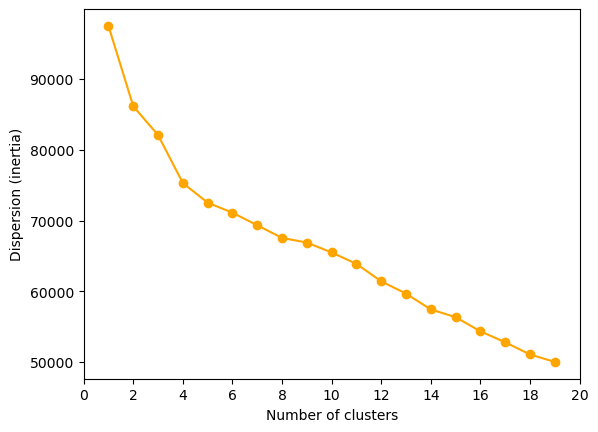

In [61]:
plt.plot(range(1, 20), dispersion, marker='o', color='orange')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
#plt.vlines(7, 5000, 600000, color='red')

plt.show()

In [79]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(scaled_info)

info_numeric['cluster_kmeans'] = kmeans.predict(scaled_info)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_2704\3850735758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_kmeans'] = kmeans.predict(scaled_info)


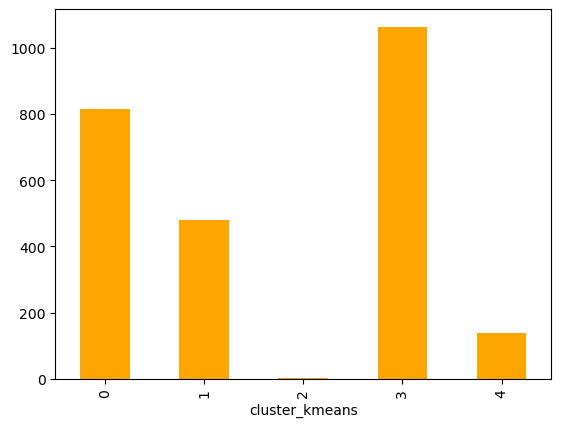

In [80]:
info_numeric.groupby(['cluster_kmeans']).size().plot(kind='bar', color='orange')
plt.show()

In [81]:
pd.set_option('display.float_format', '{:.3f}'.format)

info_numeric.groupby(['cluster_kmeans']).mean().T

#   'A': 0, married
#   'B': 1, single
#   'U': 2 unknown
#     'Single Male': 0,
#     'Single Female': 1,
#     '2 Adults No Kids': 2,
#     '2 Adults Kids': 2

# 0 - couples w/ kids
# 1 - single females
# 2 - elderly, high income
# 3 - young singles w/o kids
# 4 - high spend on GAS

cluster_kmeans,0,1,2,3,4
household_key,1298.645,1256.412,1023.000,1199.089,1343.246
retail_disc,-0.590,-0.537,-0.485,-0.551,-0.528
marital_status_code,0.387,1.299,2.000,1.347,0.696
adult_category_size,1.966,1.368,2.000,1.046,1.739
has_kids,0.702,0.116,0.000,0.149,0.413
avg_age,42.110,42.607,65.000,36.622,42.732
avg_income,101885.417,66015.593,187000.000,62002.350,102394.928
n_kids,0.957,0.137,0.000,0.150,0.725
n_household,2.940,1.696,2.000,1.236,2.551
Groceries_spend,1403.533,3839.941,15067.610,1007.569,7272.048


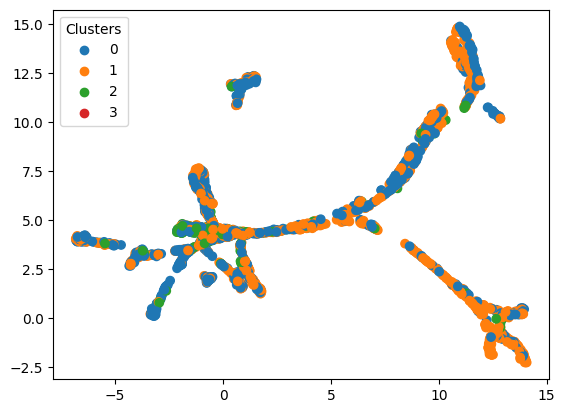

In [28]:
#run umap first

functions.visualize_dimensionality_reduction(umap_embedding, info_numeric['cluster_kmeans'].sort_index())

## Hierarchical

In [23]:
agg_clust = AgglomerativeClustering(
    linkage='ward', distance_threshold=0, n_clusters=None
    ).fit(scaled_info)

c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


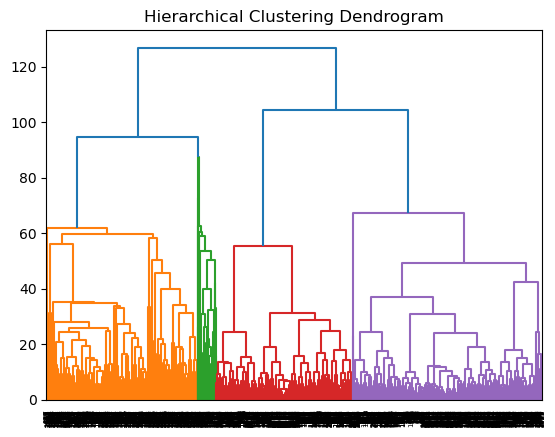

In [24]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
functions.plot_dendrogram(agg_clust, truncate_mode="level", p=50)
plt.axhline(y = 200, color = 'r', linestyle = '-')

plt.show()

In [16]:
info_numeric['cluster_ward'] = AgglomerativeClustering(
    linkage='ward', n_clusters=4
    ).fit_predict(scaled_info)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_8536\2294577397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_ward'] = AgglomerativeClustering(


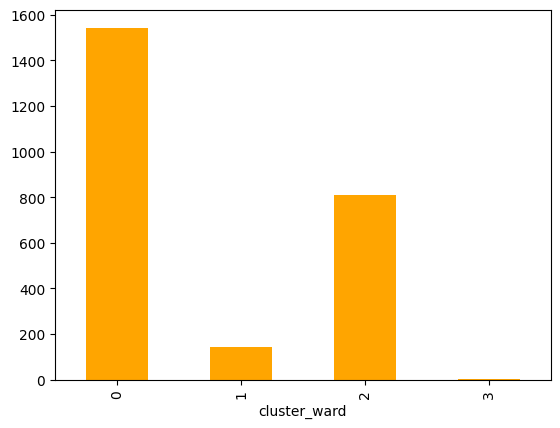

In [17]:
info_numeric.groupby(['cluster_ward']).size().plot(kind='bar', color='orange')
plt.show()

In [18]:
info_numeric.groupby(['cluster_ward']).mean().T

cluster_ward,0,1,2,3
household_key,1222.333,1282.469,1298.655,1023.000
retail_disc,-0.559,-0.521,-0.568,-0.485
coupon_disc,-0.014,-0.021,-0.012,-0.018
coupon_match_disc,-0.002,-0.004,-0.002,-0.002
marital_status_code,1.287,0.917,0.433,2.000
adult_category_size,1.147,1.593,1.990,2.000
has_kids,0.176,0.276,0.657,0.000
avg_age,38.950,42.597,41.234,65.000
avg_income,64218.406,95989.655,101091.862,187000.000
n_kids,0.202,0.448,0.900,0.000


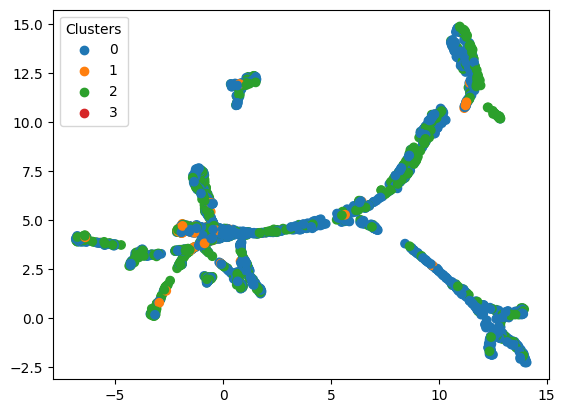

In [29]:
#run umap first

functions.visualize_dimensionality_reduction(umap_embedding, info_numeric['cluster_ward'].sort_index())

## DB Scan

In [20]:
info_numeric['cluster_dbscan'] = DBSCAN(eps=10, min_samples = 40).fit_predict(scaled_info)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_8536\2362419876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_dbscan'] = DBSCAN(eps=10, min_samples = 40).fit_predict(scaled_info)


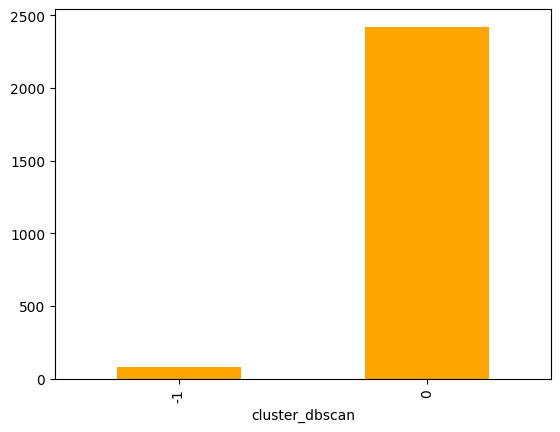

In [21]:
info_numeric.groupby(['cluster_dbscan']).size().plot(kind='bar', color='orange')
plt.show()

In [22]:
info_numeric.groupby(['cluster_dbscan']).mean().T

cluster_dbscan,-1,0
household_key,1391.316,1245.905
retail_disc,-0.551,-0.560
coupon_disc,-0.030,-0.013
coupon_match_disc,-0.004,-0.002
marital_status_code,0.924,0.991
adult_category_size,1.570,1.443
has_kids,0.342,0.338
avg_age,39.804,39.917
avg_income,91126.582,77646.014
n_kids,0.595,0.438


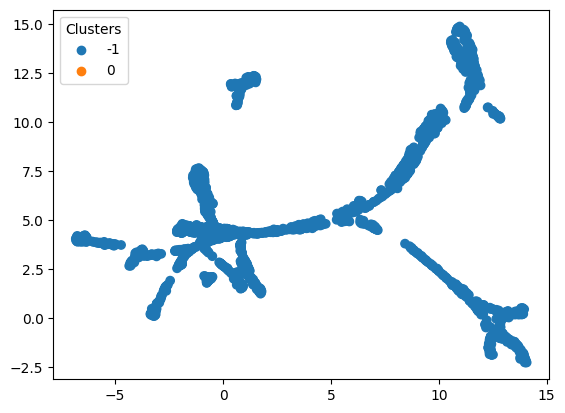

In [30]:
#run umap first

functions.visualize_dimensionality_reduction(umap_embedding, info_numeric['cluster_dbscan'].sort_index())

## UMAP

In [26]:
umap_object = umap.UMAP(n_neighbors=50, min_dist=0.3, n_components=4, random_state=42)

c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\aprataso\AppData\Local\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\aprataso\AppData\Local\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


AttributeError: module 'umap' has no attribute 'UMAP'

In [25]:
X_sample = info_numeric.sort_index()

In [26]:
umap_embedding = umap_object.fit_transform(X_sample)

C:\Users\aprataso\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


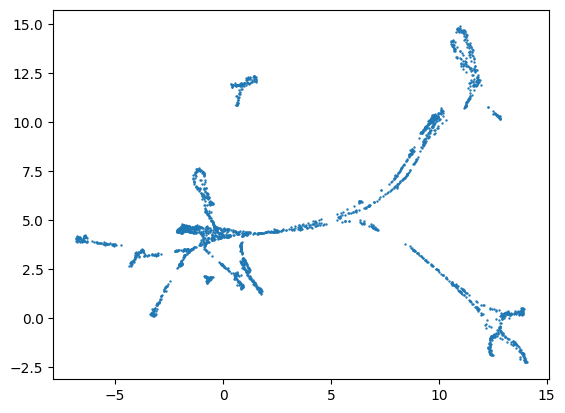

In [27]:
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1],s=0.5)

## UMAP to DB SCAN

In [69]:
clusterable_embedding = umap.UMAP(
    n_neighbors=20,
    min_dist=0.7,
    random_state=42,
).fit_transform(X_sample)


C:\Users\aprataso\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


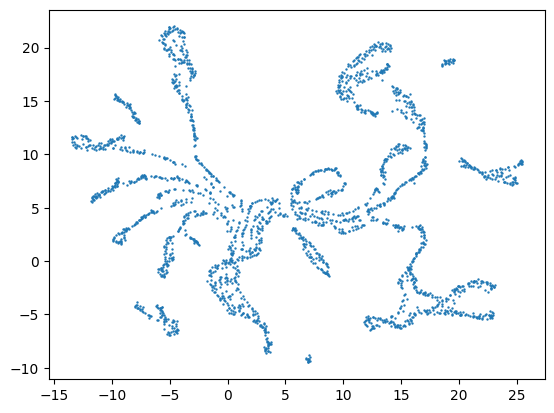

In [70]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],s=0.5)

In [ ]:
labels = DBSCAN(eps=1, min_samples=20).fit_predict(clusterable_embedding)

In [46]:
info_numeric['cluster_umap_dbscan'] = labels

C:\Users\aprataso\AppData\Local\Temp\ipykernel_8536\242391019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_umap_dbscan'] = labels


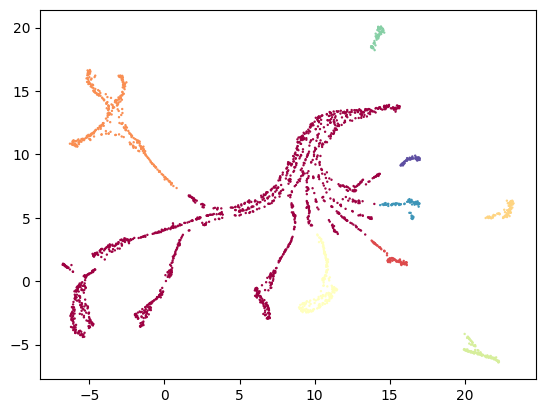

In [47]:
clustered = (labels >= 0) 
# Plotting points not belonging to any cluster in gray (outliers)
plt.scatter(clusterable_embedding[~clustered, 0],
            clusterable_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.3,
            alpha=0.5)

# Plotting points belonging to each cluster
plt.scatter(clusterable_embedding[clustered, 0],
            clusterable_embedding[clustered, 1],
            c=labels[clustered],
            s=0.5,
            cmap='Spectral');

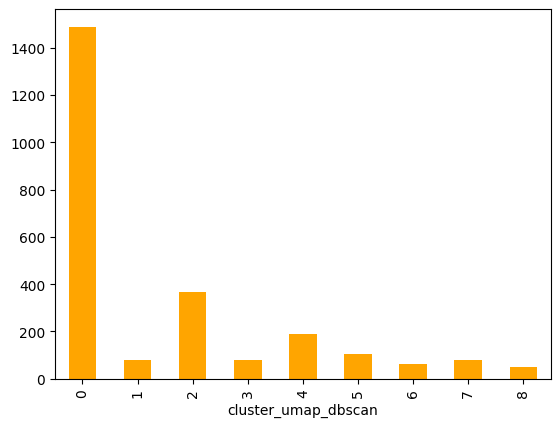

In [48]:
info_numeric.groupby(['cluster_umap_dbscan']).size().plot(kind='bar', color='orange')
plt.show()

In [49]:
info_numeric.groupby(['cluster_umap_dbscan']).mean().T

cluster_umap_dbscan,0,1,2,3,4,5,6,7,8
household_key,1370.360,884.737,936.703,1223.025,1304.112,886.163,1046.127,1494.309,1032.820
retail_disc,-0.555,-0.525,-0.556,-0.615,-0.586,-0.585,-0.541,-0.559,-0.577
coupon_disc,-0.016,-0.007,-0.010,-0.011,-0.013,-0.013,-0.006,-0.009,-0.011
coupon_match_disc,-0.003,-0.001,-0.001,-0.002,-0.002,-0.002,-0.001,-0.002,-0.001
marital_status_code,1.005,0.863,1.174,0.823,0.824,0.952,0.365,1.123,0.860
adult_category_size,1.465,1.562,1.215,1.468,1.524,1.356,1.810,1.519,1.720
has_kids,0.320,0.512,0.213,0.544,0.433,0.462,0.397,0.358,0.480
avg_age,39.958,43.569,31.139,46.310,38.246,51.596,39.484,56.222,43.080
avg_income,63929.147,137000.000,16459.128,162000.000,87000.000,112000.000,250000.000,188876.543,224500.000
n_kids,0.425,0.750,0.262,0.595,0.561,0.615,0.540,0.432,0.660


Export

In [86]:
info_numeric.to_csv(
    'C:/Users/aprataso/Downloads/final_data/treated/cluster_data_num.csv',
    index=False)